In [1]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print() instead.
from qiskit_textbook.tools import array_to_latex

# 1. Exploring the CNOT-Gate

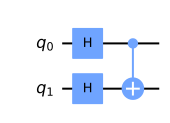

In [2]:
"""
前のセクションでは、CNOTゲートを使用したいくつかの非常に基本的な結果を確認しました。ここでは、さらに興味深い結果をいくつか見ていきます。

制御量子ビットを状態 |+⟩ におくことで、2つの量子ビットをエンタングルできました：

CNOT|0+⟩=1/√2(|00⟩+|11⟩)
 
しかし、2番目の量子ビットも重ね合わせの状態にするどうなるでしょうか？
"""
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

<IPython.core.display.Math object>

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


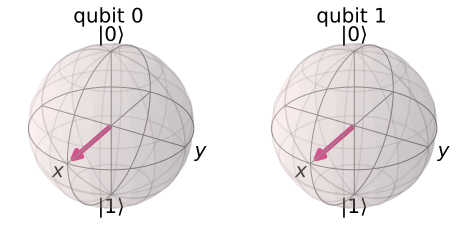

In [4]:
"""
上の回路について、CNOTを作用させます：

|++⟩=12(|00⟩+|01⟩+|10⟩+|11⟩)
 
CNOTは|01⟩ と|11⟩ の振幅をスワップするため、結果に変わりが無いことが分かります：
"""
# Let's see the result
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

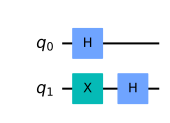

In [5]:
"""
標的量子ビットの状態を 
|−⟩ にすると（つまり|−+⟩にすると）、マイナスの位相をもちます：
"""
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

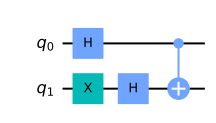

<IPython.core.display.Math object>

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


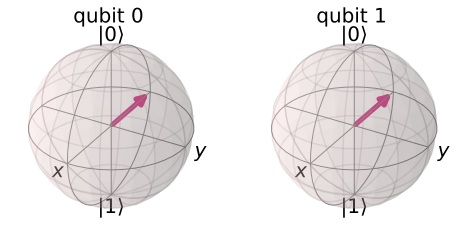

In [6]:
"""
CNOTをこの状態に作用させる場合、 |01⟩  と |11⟩の振幅がスワップされて、次の状態になります：

CNOT|−+⟩=1/2(|00⟩−|01⟩−|10⟩+|11⟩)
CNOT|−+⟩=|−−⟩
 
これは興味深いものです。なぜなら、標的量子ビットの状態を変更せずに、制御量子ビットの状態に影響を与えるからです。
"""
qc.cx(0,1)
display(qc.draw())

final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

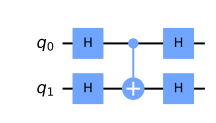

<IPython.core.display.Math object>

In [7]:
"""
Hゲートが |+⟩→|0⟩  と  |−⟩→|1⟩
の変換をすることを覚えていたら、CNOTをHゲートでラップすると、向きが反対のCNOTと同じ作用になることが分かると思います。
"""
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 
# `display` is an IPython tool, remove if it causes an error
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,unitary_backend).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

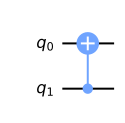

<IPython.core.display.Math object>

In [8]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())

unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,unitary_backend).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

# 2. 位相キックバック

# 2.1 CNOT回路の等価性の説明

# 2.2 Tゲートでのキックバック

<ipython-input-9-fdbf43f7faa2>:2: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(pi/4, 0, 1)


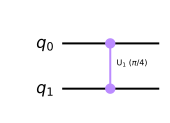

In [9]:
"""別の制御オペレーションである、制御Tゲートを見てみましょう："""
qc = QuantumCircuit(2)
qc.cu1(pi/4, 0, 1)
qc.draw()

In [12]:
"""制御Tゲートは以下の行列です："""
# See Results:
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,unitary_backend).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Controlled-T} = \n")

<IPython.core.display.Math object>

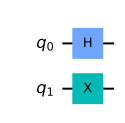

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


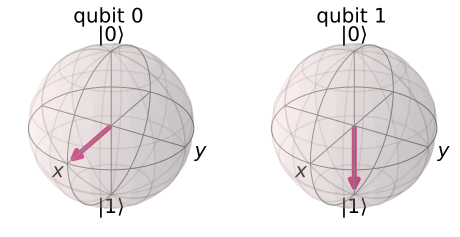

In [13]:
"""Controlled-Tゲート
これは、標的量子ビットを変化させずに、制御量子ビットをブロッホ球のZ軸回りに回転させる作用があります。これをQiskitで見てみましょう：
"""
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

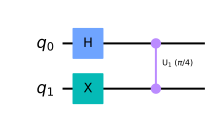

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


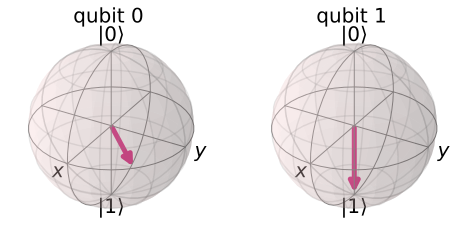

In [14]:
"""
Controlled-Tゲートを適用した場合
ブロッホ球では左の図が、ブロッホ球のZ軸回りに π/4 回転したことが分かります。
"""
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cu1(pi/4, 0, 1)
display(qc.draw())
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

# 練習問題: 

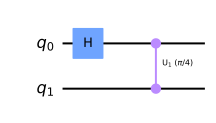

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


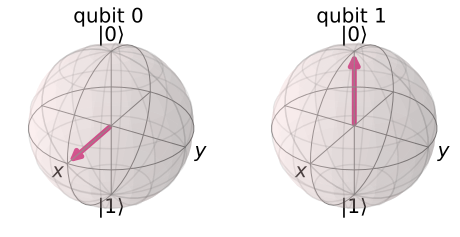

In [19]:
"""(1)
q1が0だから回転しない・・・？
"""
qc = QuantumCircuit(2)
qc.h(0)
qc.cu1(pi/4, 0, 1)  # cu1(theta, control_qubit, target_qubit)
display(qc.draw())
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

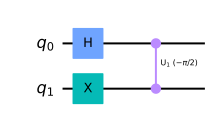

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


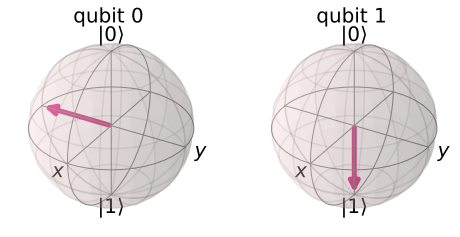

In [21]:
"""(2-1)
q1が1なので、q0がブロッホ球のZ軸を中心に-90度回転
"""
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cu1(-pi/2, 0, 1)
display(qc.draw())
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

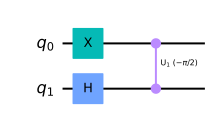

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


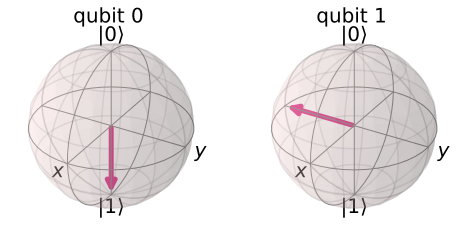

In [23]:
"""(2-2)
q0が1なので、q1がブロッホ球のZ軸を中心に-90度回転
制御Zゲートには、制御量子とターゲット量子の区別がない。
"""
qc = QuantumCircuit(2)
qc.x(0)
qc.h(1)
qc.cu1(-pi/2, 0, 1)
display(qc.draw())
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

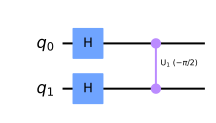

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


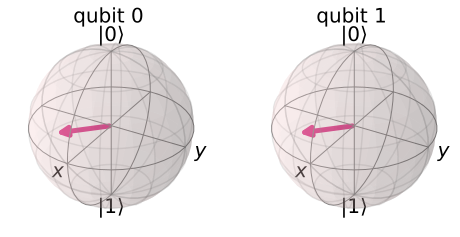

In [28]:
"""(2-3)
q0とq1がそれぞれ45度回転
"""
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cu1(-pi/2, 0, 1)
display(qc.draw())
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

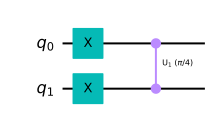

c:\Users\takey\Desktop\myspace\workspace\my-practice\qiskit_textbook_practice\venv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


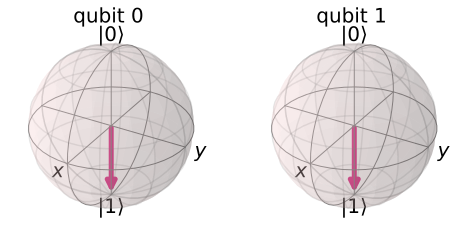

In [27]:
"""(3)
q1が1なのでq0が45度回転？（グローバルフェーズなので観測できない）
"""
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.cu1(pi/4, 0, 1)
display(qc.draw())
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)